In [133]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Прочитайте файл 2017_jun_final.csv с помощью метода read_csv

In [134]:
data = pd.read_csv("2017_jun_final.csv")

# Прочитайте полученную таблицу используя метод head

In [135]:
data.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


# Определите размер таблицы с помощью метода shape

In [136]:
data.shape

(8704, 25)

# Определите типы всех столбцов с помощью dataframe.dtypes

In [137]:
data.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

# Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [138]:
data.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

# Удалите все столбцы с пропусками, кроме столбца "Язык.программирования"

In [139]:
d = data.isna().any()
cols_to_ignore = ['Язык.программирования']
d[cols_to_ignore] = False
data.drop(d.index[d], axis=1, inplace=True)

# Опять посчитайте, какая доля пропусков содержится в каждой колонке и убедитесь, что остался только столбец "Язык.программирования"

In [140]:
data.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

# Удалите все строки в исходной таблице с помощью метода dropna

In [141]:
data.dropna(inplace=True)

# Определите новый размер таблицы с помощью метода shape

In [142]:
data.shape

(4854, 20)

# Создайте новую таблицу python_data в которой будут только строки со специалистами указавшими язык программирования Python

In [143]:
python_data = pd.DataFrame(data.loc[data['Язык.программирования'] == 'Python'])

# Определите размер таблицы python_data с помощью метода shape

In [144]:
python_data.shape

(207, 20)

# Используя метод groupby выполните группировку по столбцу "Должность"

In [145]:
grouped_data = python_data.groupby(['Должность'])

# Создайте новый DataFrame, где для сгруппированных данных по столбцу "Должность", выполните агрегацию данных с помощью метода agg и найдите минимальное и максимальное значение в столбце "Зарплата.в.месяц"

In [146]:
aggregate_data = grouped_data.agg({'Зарплата.в.месяц':['min', 'max']})

In [147]:
aggregate_data

Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200

# Создайте функцию fill_avg_salary которая будет возвращать среднее значение заработной платы в месяц. Используйте ее для метода apply и создайте новый столбик "avg"

In [148]:
def fill_avg_salary(x):
    return x.mean()

In [149]:
aggregate_data['avg'] = aggregate_data.apply(fill_avg_salary, axis=1)

In [150]:
aggregate_data

Зарплата.в.месяц           avg
                                      min   max        
Должность                                              
Junior Software Engineer              100  1250   675.0
Senior Software Engineer             1300  9200  5250.0
Software Engineer                     500  5400  2950.0
System Architect                     3000  5000  4000.0
Technical Lead                       1425  6200  3812.5

# Создайте описательную статистику с помощью метода describe для нового столбца.

In [151]:
aggregate_data['avg'].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

# Сохраните полученную таблицу в CSV файл

In [152]:
aggregate_data.to_csv('data.csv')

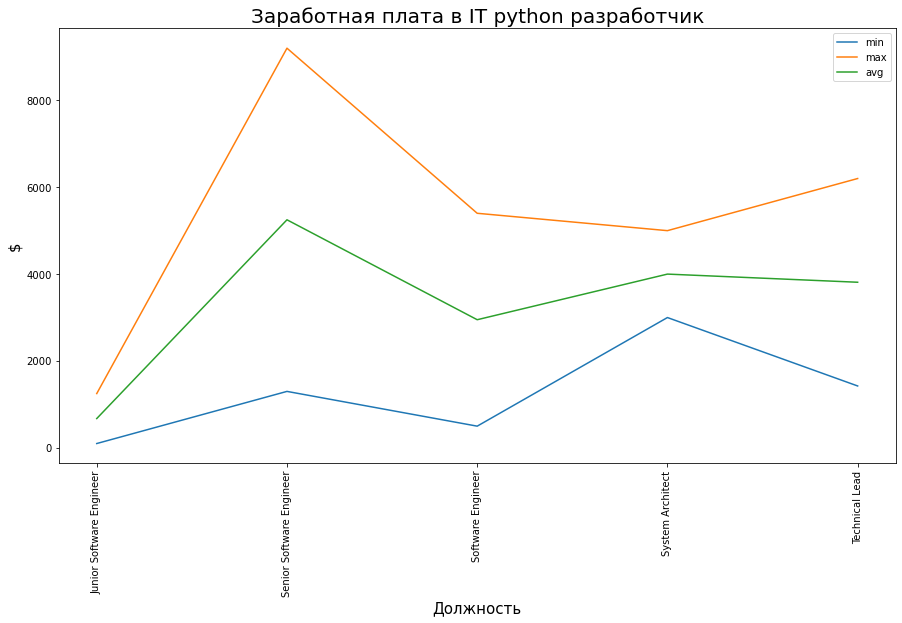

In [153]:
plt.figure(figsize=(15, 8))
plt.plot(aggregate_data)
plt.xlabel('Должность', fontsize = 15)
plt.ylabel('$', fontsize=15)
plt.title('Заработная плата в IT python разработчик', fontsize=20)
plt.xticks(rotation=90)
plt.legend(['min', 'max','avg'])
plt.show()

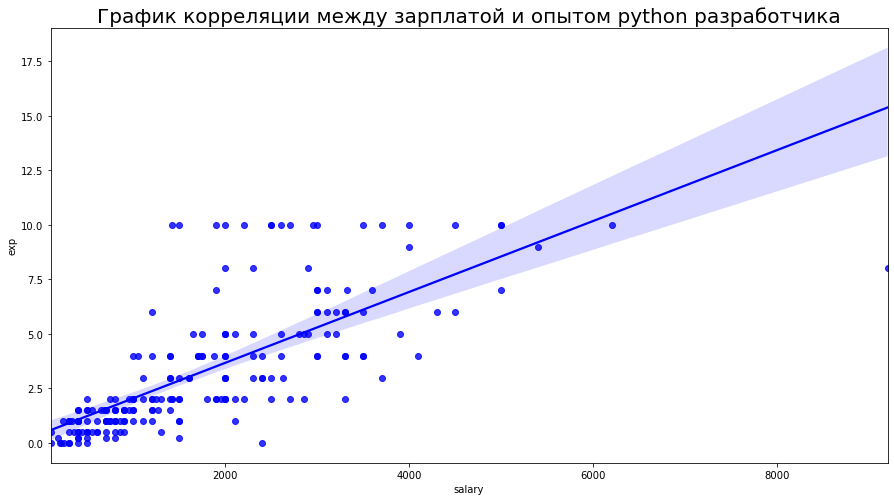

In [154]:
plt.figure(figsize=(15, 8))
sns.regplot(x ='salary', y = 'exp', color='b', data = python_data)
plt.title('График корреляции между зарплатой и опытом python разработчика', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Заработная плата в IT(Python) по должности')

<Figure size 1080x576 with 0 Axes>

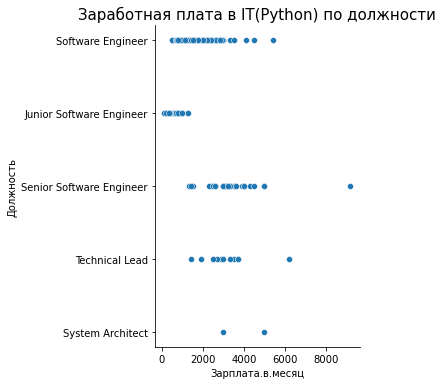

In [155]:
plt.figure(figsize=(15, 8))
sns.relplot(data=python_data, x = 'Зарплата.в.месяц', y = 'Должность')
plt.title('Заработная плата в IT(Python) по должности', fontsize = 15)

In [156]:
java_script_data = pd.DataFrame(data.loc[data['Язык.программирования'] == 'JavaScript'])

Text(0.5, 1.0, 'Заработная плата в IT(javascript) по должности')

<Figure size 1080x576 with 0 Axes>

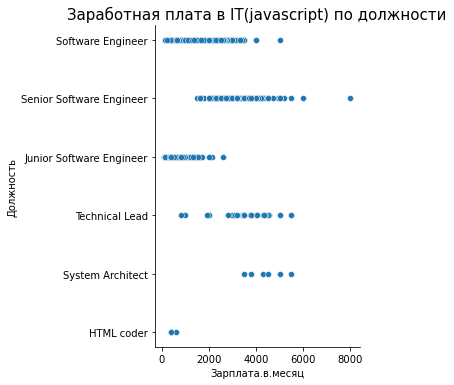

In [157]:
plt.figure(figsize=(15, 8))
sns.relplot(data=java_script_data, x = 'Зарплата.в.месяц', y = 'Должность')
plt.title('Заработная плата в IT(javascript) по должности', fontsize = 15)

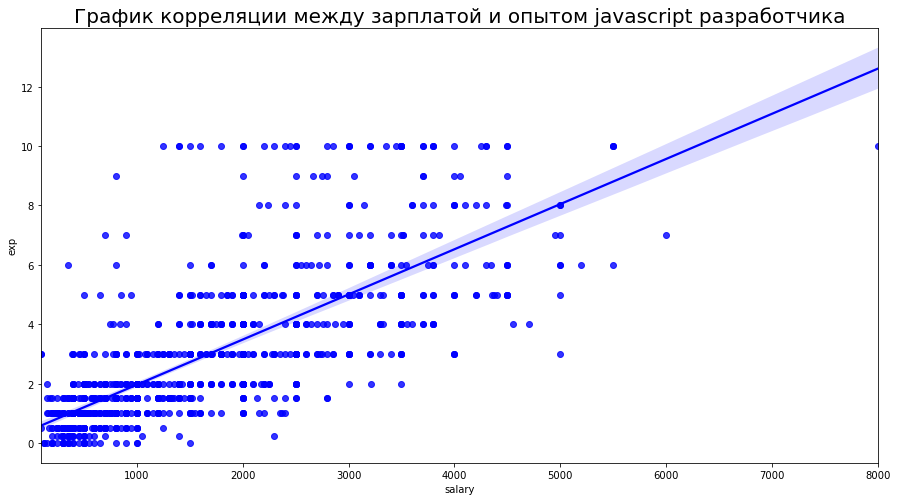

In [158]:
plt.figure(figsize=(15, 8))
sns.regplot(x ='salary', y = 'exp', color='b', data = java_script_data)
plt.title('График корреляции между зарплатой и опытом javascript разработчика', fontsize=20)
plt.show()